# **Mount GDrive and import package**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Import packages and set paths

In [2]:
# It seems the cegaltools need to be installed everytime of mounting to Google Drive
!pip install pip install cegal.welltools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.9 MB/s 


In [3]:
!pip install python-ternary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Data path and load data**

In [4]:
import sys
#from cegaltools.welltools.plotting import CegalWellPlotter as cwp
from cegal.welltools.plotting import CegalWellPlotter as cwp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from cegaltools.welltools.wells import Well
from cegal.welltools.wells import Well
import plotly.express as px
import ternary
import plotly.graph_objects as go
import seaborn as sns

import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

import lasio
import lasio.examples
import json
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,r2_score

from matplotlib.colors import ListedColormap
from matplotlib import rc, rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
import math

from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

In [5]:
path_prefix = '/content/gdrive/My Drive/'
customized_path_to_project_path = 'Log_data_analysis/'
sys_path = path_prefix + customized_path_to_project_path
sys.path.append(sys_path)

**Cegal Tools**

Read data: Raw log data and ELAN interpretation data.

In [6]:
well_from_las_raw_ccs1 = Well(filename='CCS1.las', path=sys_path+'Raw Logs/')
well_from_las_raw_ccs2 = Well(filename='CCS2.las', path=sys_path+'Raw Logs/')
well_from_las_raw_vw1 = Well(filename='VW1.las', path=sys_path+'Raw Logs/')
well_from_las_raw_vw2 = Well(filename='VW2.las', path=sys_path+'Raw Logs/')

well_from_las_elan_ccs1 = Well(filename='CCS #1_Elan_2020_CoreCal.las', path=sys_path+'ELAN/')
well_from_las_elan_ccs2 = Well(filename='CCS #2_Elan_2020_CoreCal.las', path=sys_path+'ELAN/')
well_from_las_elan_vw1 = Well(filename='Verification Well #1_Elan_2020_CoreCal.las', path=sys_path+'ELAN/')
well_from_las_elan_vw2 = Well(filename='Verification Well #2_Elan_2020_CoreCal.las', path=sys_path+'ELAN/')

well_from_las_pnx_ccs1 = Well(filename='2019-03-ADM_CCS1_Well_Integrity_Results_all_runs.las', path=sys_path+'PNX/')
well_from_las_pnx_vw1 = Well(filename='2019-03-ADM_VW1_Well_Integrity_Results_all_runs.las', path=sys_path+'PNX/')

# Conventional well-logging data

data preprocessing and visualization

In [7]:
ccs1_raw_data_df = well_from_las_raw_ccs1.df()
print('The raw log data shape (CCS1):')
print(ccs1_raw_data_df.shape)

ccs1_elan_data_df = well_from_las_elan_ccs1.df()
print('The interpreted log data shape (CCS1):')
print(ccs1_elan_data_df.shape)

ccs2_raw_data_df = well_from_las_raw_ccs2.df()
print('The raw log data shape (CCS2):')
print(ccs2_raw_data_df.shape)

ccs2_elan_data_df = well_from_las_elan_ccs2.df()
print('The interpreted log data shape (CCS2):')
print(ccs2_elan_data_df.shape)

vw2_raw_data_df = well_from_las_raw_vw2.df()
print('The raw log data shape (VW2):')
print(vw2_raw_data_df.shape)

vw2_elan_data_df = well_from_las_elan_vw2.df()
print('The interpreted log data shape (VW2):')
print(vw2_elan_data_df.shape)

The raw log data shape (CCS1):
(4395, 12)
The interpreted log data shape (CCS1):
(4395, 38)
The raw log data shape (CCS2):
(4311, 22)
The interpreted log data shape (CCS2):
(4311, 38)
The raw log data shape (VW2):
(4417, 18)
The interpreted log data shape (VW2):
(4417, 38)


In [8]:
Raw_Group = ['HCAL','HTNP','PEFZ','RHOZ','RLA2','RLA3','RLA4','RLA5','GAMMA','DTCO','DTSM']
#Raw_Group = ['HCAL','HTNP','PEFZ','RHOZ','GAMMA','DTCO','DTSM']
Label_Group1 = ['CALCITE','CHLORITE','DOLOMITE','HEMATITE','ILLITE','K-FELDSPAR','KAOLINITE','N-FELDSPAR','PYRITE','QUARTZ','SIDERITE','PHIT']
Label_Group2 = ['DRY_WEIGHT_CALCITE','DRY_WEIGHT_CHLORITE','DRY_WEIGHT_DOLOMITE','DRY_WEIGHT_HEMATITE','DRY_WEIGHT_ILLITE','DRY_WEIGHT_K-FELDSPAR','DRY_WEIGHT_KAOLINITE','DRY_WEIGHT_N-FELDSPAR','DRY_WEIGHT_PYRITE','DRY_WEIGHT_QUARTZ','DRY_WEIGHT_SIDERITE']
Label_Group3 = ['CLASSIFICATION_IPSOM']
Label_Group4 = ['KSDR_PY'] # No available NMR data.
Label_Group = Label_Group1+Label_Group2+Label_Group3+Label_Group4

# ccs1_data.iloc[:2] to read the first 2 rows.
ccs1 = ccs1_raw_data_df.join(ccs1_elan_data_df)
ccs1_data = ccs1[Raw_Group+Label_Group]
ccs1_data_value = ccs1_data.dropna()
MD_ccs1 = np.arange(5101,7186.5,0.5)
ccs1_data_value['Z_MD'] = MD_ccs1 

ccs2 = ccs2_raw_data_df.join(ccs2_elan_data_df)
ccs2_data = ccs2[Raw_Group+Label_Group]
ccs2_data_value = ccs2_data.dropna()
MD_ccs2 = np.arange(5226.5,7148,0.5)
ccs2_data_value['Z_MD'] = MD_ccs2

vw2 = vw2_raw_data_df.join(vw2_elan_data_df)
vw2_data = vw2[Raw_Group+Label_Group]
vw2_data_value = vw2_data.dropna()
MD_vw2 = np.arange(5295.2,7150,0.5)
vw2_data_value['Z_MD'] = MD_vw2

all_train_data = ccs1_data_value.append(ccs2_data_value)
#all_train_data = ccs2_data_value
print('All training data size:')
print(all_train_data.shape)

all_test_data = vw2_data_value
print('All testing data size:')
print(all_test_data.shape)

Raw_Group = ['HCAL','HTNP','PEFZ','RHOZ','RLA2','RLA3','RLA4','RLA5','GAMMA','DTCO','DTSM']

All training data size:
(8014, 37)
All testing data size:
(3710, 37)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

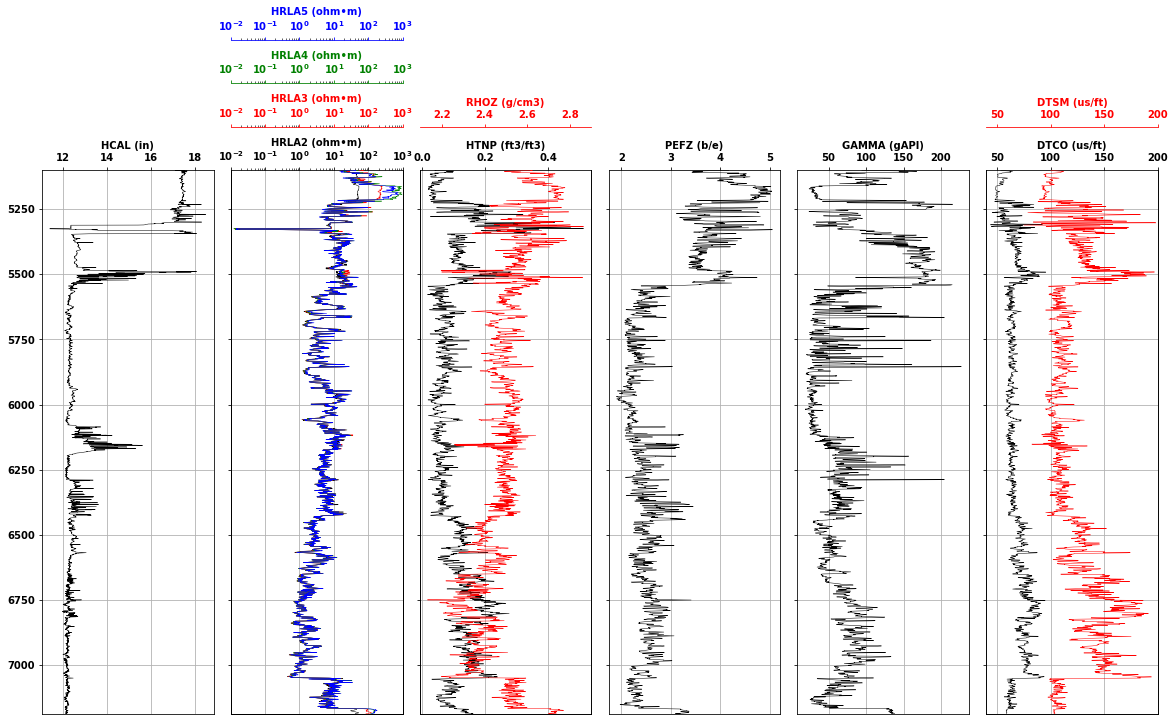

In [9]:
fig, axes = plt.subplots(figsize=(20,10))

curve_names = ['HCAL (in)','HRLA2 (ohm•m)','HRLA3 (ohm•m)','HRLA4 (ohm•m)','HRLA5 (ohm•m)', 'HTNP (ft3/ft3)', 'RHOZ (g/cm3)', 'PEFZ (b/e)', 'GAMMA (gAPI)', 'DTCO (us/ft)', 'DTSM (us/ft)']
rc('font', weight='bold')
#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()
ax6 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1)
ax7 = ax6.twiny()
ax8 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,6), (0,5), rowspan=1, colspan = 1)
ax11 = ax10.twiny()

#Set up the individual log tracks / subplots
ax1.plot('HCAL', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)

# Plot2
ax2.plot('RLA2', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xlim(0.01, 1000)
ax2.semilogx()

ax3.plot('RLA3', 'Z_MD', data = ccs1_data_value, color = "red", lw = 0.5)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xlim(0.01, 1000)
ax3.semilogx()

ax4.plot('RLA4', 'Z_MD', data = ccs1_data_value, color = "green", lw = 0.5)
ax4.xaxis.label.set_color("green")
ax4.tick_params(axis='x', colors="green")
ax4.spines["top"].set_edgecolor("green")
ax4.set_xlim(0.01, 1000)
ax4.semilogx()

ax5.plot('RLA5', 'Z_MD', data = ccs1_data_value, color = "blue", lw = 0.5)
ax5.xaxis.label.set_color("blue")
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xlim(0.01, 1000)
ax5.semilogx()

# Plot3
ax6.plot('HTNP', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")

ax7.plot('RHOZ', 'Z_MD', data = ccs1_data_value, color = "red", lw = 0.5)
ax7.xaxis.label.set_color("red")
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_edgecolor("red")

# Plot4
ax8.plot('PEFZ', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")

# Plot5
ax9.plot('GAMMA', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)
ax9.xaxis.label.set_color("black")
ax9.tick_params(axis='x', colors="black")
ax9.spines["top"].set_edgecolor("black")

# Plot6
ax10.plot('DTCO', 'Z_MD', data = ccs1_data_value, color = "black", lw = 0.5)
ax10.xaxis.label.set_color("black")
ax10.tick_params(axis='x', colors="black")
ax10.spines["top"].set_edgecolor("black")
ax10.set_xlim(40, 200)

ax11.plot('DTSM', 'Z_MD', data = ccs1_data_value, color = "red", lw = 0.5)
ax11.xaxis.label.set_color("red")
ax11.tick_params(axis='x', colors="red")
ax11.spines["top"].set_edgecolor("red")
ax11.set_xlim(40, 200)

for i, ax in enumerate(fig.axes):
  ax.set_ylim(7186.5, 5101) # Set the depth range
    
  ax.tick_params(labelsize=10)
  ax.xaxis.set_ticks_position("top")
  ax.xaxis.set_label_position("top")
  ax.set_xlabel(curve_names[i],fontweight="bold",size=10)

  if i in [2,6,10]:
    ax.spines["top"].set_position(("axes", 1.08))
  else:
    ax.grid()

  if i in [3]:
    ax.spines["top"].set_position(("axes", 1.16))
  else:
    ax.grid()

  if i == 4:
    ax.spines["top"].set_position(("axes", 1.24))
  else:
    ax.grid()

for ax in [ax2, ax6, ax8, ax9, ax10]:
    plt.setp(ax.get_yticklabels(), visible = False)

#Reduce the space between each subplot
fig.subplots_adjust(wspace = 0.1)
#fig.savefig(sys_path+'Figures/Conventional_log_raw.png',dpi=300, bbox_inches='tight')

Boxplot

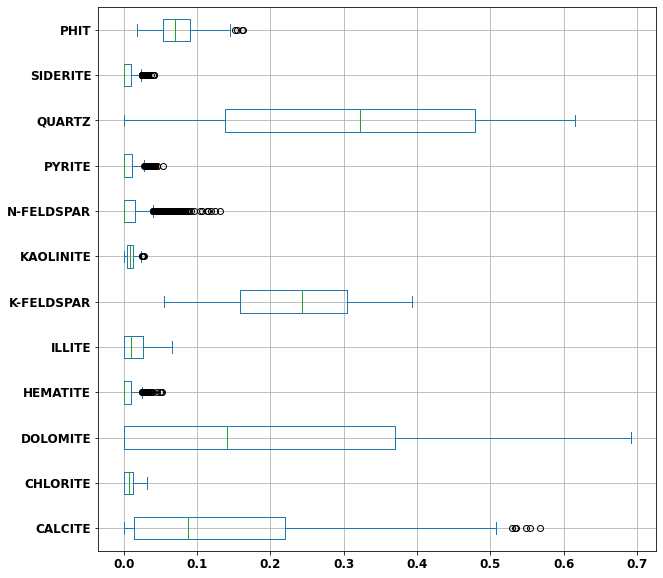

In [10]:
ccs1_mineralogy = ccs1_data_value[Label_Group1]
ccs1_mineralogy_Eau = ccs1_mineralogy[(ccs1_data_value['Z_MD'] < 5526)]
rc('font', weight='bold')
fig = ccs1_mineralogy_Eau.plot(kind='box',figsize=(10,10),grid=True, vert=False, fontsize=12) #showfliers=False
#fig = fig.get_figure()
#fig.savefig(sys_path+'Figures/Mineralogy.png',dpi=300,bbox_inches='tight')

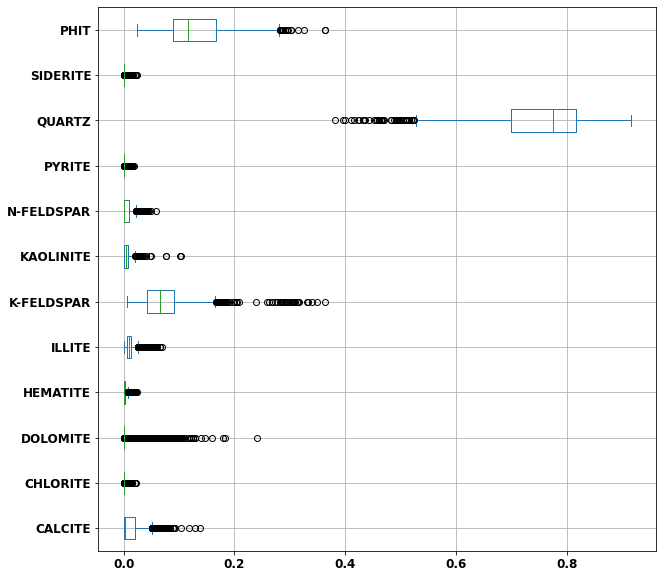

In [11]:
ccs1_mineralogy = ccs1_data_value[Label_Group1]
ccs1_mineralogy_MtSimon = ccs1_mineralogy[(ccs1_data_value['Z_MD'] > 5526) & (ccs1_data_value['Z_MD'] < 7000)]
rc('font', weight='bold')
ccs1_mineralogy_MtSimon.plot(kind='box',figsize=(10,10),grid=True, vert=False, fontsize=12) #showfliers=False
#fig = fig.get_figure()
#fig.savefig(sys_path+'Figures/Mineralogy.png',dpi=300,bbox_inches='tight')

In [12]:
data_total = ccs1_mineralogy.assign(Formation='Whole Logging Formation')
data_Eau = ccs1_mineralogy_Eau.assign(Formation='Eau Claire Formation')
data_MtSimon = ccs1_mineralogy_MtSimon.assign(Formation='Mt. Simon Sandstone')

cdf = pd.concat([data_total, data_Eau, data_MtSimon])   
mdf = pd.melt(cdf, id_vars=['Formation'], var_name=['Minerals'])

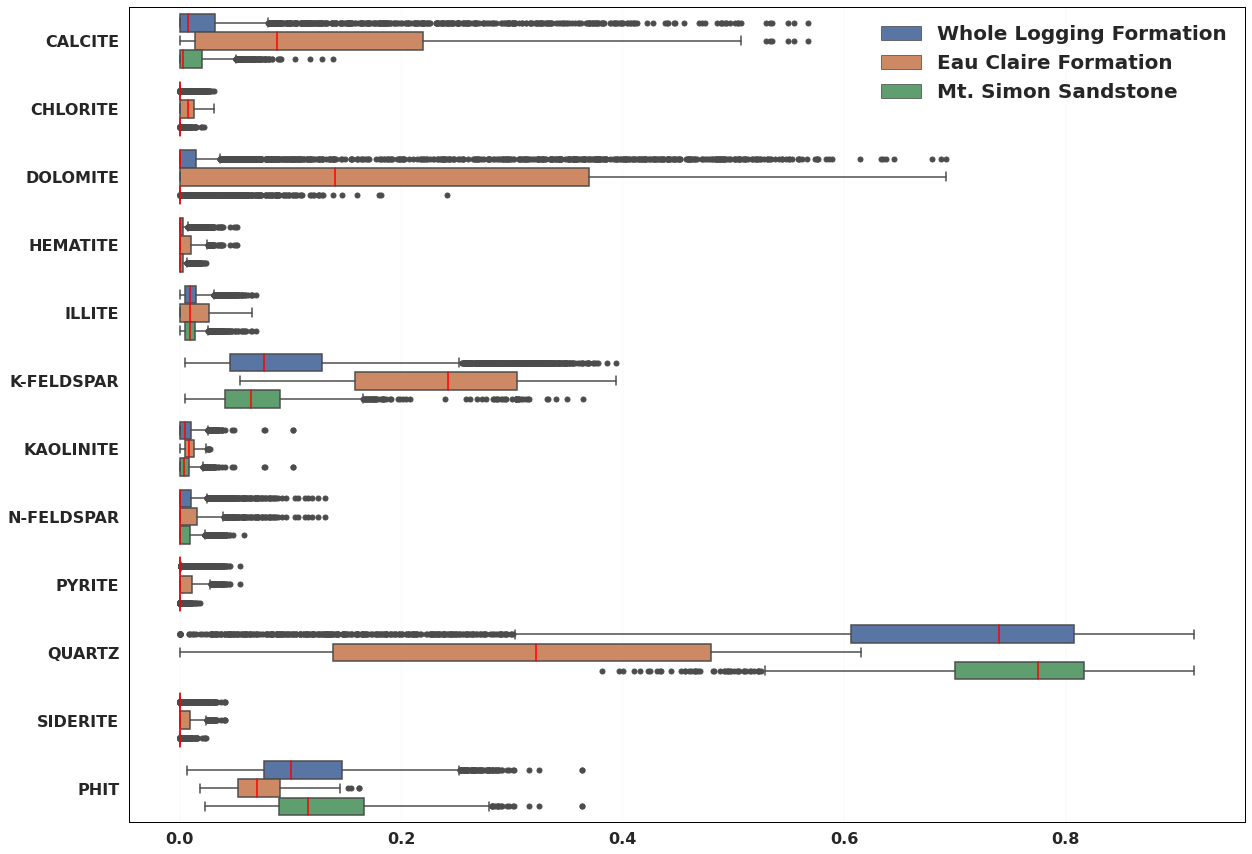

In [13]:
sns.set(rc={'figure.figsize':(20,15),'legend.frameon': False})
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})

ax = sns.boxplot(y="Minerals", x="value", hue="Formation", data=mdf,medianprops=dict(color="red", alpha=1.0),flierprops=dict(marker="o"))
for _,s in ax.spines.items():
  s.set_linewidth(1)
  s.set_color('black')

#ax.yaxis.grid(True) # Hide the horizontal gridlines
#ax.xaxis.grid(True) # Show the vertical gridlines
#ax.xaxis.grid(True, which='major')
ax.set_xlabel("",fontsize=20,fontdict={'weight': 'bold'})
ax.set_ylabel("",fontsize=20,fontdict={'weight': 'bold'})
ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16)
fig = ax.get_figure()
#fig.savefig(sys_path+'Figures/Mineralogy.png',dpi=300,bbox_inches='tight')

Ternary

In [14]:
mineral_QFM = ccs1_data_value['QUARTZ'] + ccs1_data_value['N-FELDSPAR'] + ccs1_data_value['K-FELDSPAR']
mineral_clay = ccs1_data_value['KAOLINITE'] + ccs1_data_value['ILLITE'] + ccs1_data_value['HEMATITE']
mineral_carbon = ccs1_data_value['CALCITE'] + ccs1_data_value['DOLOMITE']

mineral_QFM_df = mineral_QFM.to_frame('Quartz + Feldspar')
mineral_clay_df = mineral_clay.to_frame('Total Clay')
mineral_carbon_df = mineral_carbon.to_frame('Calcite + Dolomite')

ccs1_minerals = pd.concat([mineral_QFM_df, mineral_clay_df, mineral_carbon_df], axis=1)
ccs1_minerals['Z_MD'] = MD_ccs1 

In [15]:
ccs1_minerals_detailed = ccs1_data_value[Label_Group1]
ccs1_minerals_detailed.describe()

,CALCITE,CHLORITE,DOLOMITE,HEMATITE,ILLITE,K-FELDSPAR,KAOLINITE,N-FELDSPAR,PYRITE,QUARTZ,SIDERITE,PHIT
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,0.036598,0.002097,0.046194,0.002604,0.011633,0.104048,0.007068,0.007228,0.002014,0.663302,0.001449,0.115767
std,0.078605,0.004822,0.117969,0.005278,0.010483,0.084282,0.007830,0.013511,0.005986,0.211958,0.004523,0.055827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.005330,0.000000,0.000000,0.000000,0.000000,0.000000,0.006960
25%,0.000000,0.000000,0.000000,0.000000,0.004610,0.045220,0.000500,0.000000,0.000000,0.605835,0.000000,0.076530
50%,0.007800,0.000000,0.000000,0.000000,0.009360,0.076240,0.005130,0.000000,0.000000,0.739880,0.000000,0.100450
75%,0.031915,0.000000,0.014640,0.003135,0.015150,0.128750,0.010440,0.009980,0.000400,0.807590,0.000000,0.146875
max,0.567370,0.031150,0.691580,0.052040,0.068780,0.393550,0.102730,0.131280,0.054250,0.915870,0.041230,0.363530


In [16]:
ccs1_minerals_Eau = ccs1_minerals[(ccs1_minerals['Z_MD'] < 5526)]
ccs1_minerals_MtSimon = ccs1_minerals[(ccs1_minerals['Z_MD'] > 5526) & (ccs1_minerals['Z_MD'] < 7000)]

In [17]:
color_value_Eau = ccs1_data_value['PHIT'][(ccs1_minerals['Z_MD'] < 5526)]
fig = px.scatter_ternary(ccs1_minerals_Eau, a="Quartz + Feldspar", b="Total Clay", c="Calcite + Dolomite",color=color_value_Eau)

fig.update_layout(
    font_family="Arial Black",
    font_color="black",
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Porosity",
    ),
)

fig.update_layout({
    'ternary':
      {
      'sum':1,
      'aaxis':{'title': '<b>Quartz + Feldspar<br></b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
      'baxis':{'title': '<b><br>Total Clay</b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
      'caxis':{'title': '<b><br>Calcite + Dolomite</b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}}})

fig.show()

In [18]:
color_value_MtSimon = ccs1_data_value['PHIT'][(ccs1_minerals['Z_MD'] > 6400) & (ccs1_minerals['Z_MD'] < 7000)]
color_value_MtSimon.mean()

0.1780359549624687

In [19]:
color_value_MtSimon = ccs1_data_value['PHIT'][(ccs1_minerals['Z_MD'] > 5526) & (ccs1_minerals['Z_MD'] < 7000)]
fig = px.scatter_ternary(ccs1_minerals_MtSimon, a="Quartz + Feldspar", b="Total Clay", c="Calcite + Dolomite",color=color_value_MtSimon)

fig.update_layout(
    font_family="Arial Black",
    font_color="black",
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Porosity",
    ),
)

fig.update_layout({
    'ternary':
      {
      'sum':1,
      'aaxis':{'title': '<b>Quartz + Feldspar<br></b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
      'baxis':{'title': '<b><br>Total Clay</b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]},
      'caxis':{'title': '<b><br>Calcite + Dolomite</b>', 'min': 0, 
          'linewidth':2, 'ticks':'outside',
          'tickmode':'array','tickvals':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}}})

fig.show()

# PNX well-logging data

In [20]:
ccs1_pnx_data_df = well_from_las_pnx_ccs1.df()
MD_ccs1 = np.arange(0, 7350.5,0.5)
ccs1_pnx_data_df['Z_MD'] = MD_ccs1 
print('The PNX logging data (CCS1):')
print(ccs1_pnx_data_df.shape)

vw1_pnx_data_df = well_from_las_pnx_vw1.df()
MD_vw1 = np.arange(59.0, 7290, 0.5)
vw1_pnx_data_df['Z_MD'] = MD_vw1 
print('The PNX logging data (VW1):')
print(vw1_pnx_data_df.shape)

The PNX logging data (CCS1):
(14701, 140)
The PNX logging data (VW1):
(14462, 165)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [21]:
ccs1_pnx_data_value = ccs1_pnx_data_df.dropna()
vw1_pnx_data_value = vw1_pnx_data_df.dropna()

Read data CCS1

In [22]:
# 2014_07
Raw_Group_2014_07 = ['GR_2014-07','FNXS_2014_07','GRAT_2014_07','SIBH_2014_07','SIGM_2014_07','TPHI_LIME_2014_07','WPRE_2014-07','WTEP_2014-07','Z_MD']
Label_Group_2014_07 = ['CO2_2014_07','CO2SAT_2014_07','FILT_INJ_WATER_2014_07','WATER_2014_07']
Group_2014_07 = Raw_Group_2014_07 + Label_Group_2014_07

ccs1_pnx_data_value_2014_07 = ccs1_pnx_data_df[Group_2014_07]
ccs1_pnx_data_value_nona_2014_07 = ccs1_pnx_data_value_2014_07.dropna()
ccs1_pnx_data_value_2014_07_ROI = ccs1_pnx_data_value_nona_2014_07[(ccs1_pnx_data_value_nona_2014_07['Z_MD'] > 6894.5) & (ccs1_pnx_data_value_nona_2014_07['Z_MD'] < 7050)]

# 2016_10
Raw_Group_2016_10 = ['GR_2016-10','FNXS_2016_10','GRAT_2016_10','SIBH_2016_10','SIGM_2016_10','TPHI_LIME_2016_10','WPRE_2016-10','WTEP_2016-10','Z_MD']
Label_Group_2016_10 = ['CO2_2016_10','CO2SAT_2016_10','FILT_INJ_WATER_2016_10','WATER_2016_10']
Group_2016_10 = Raw_Group_2016_10 + Label_Group_2016_10

ccs1_pnx_data_value_2016_10 = ccs1_pnx_data_df[Group_2016_10]
ccs1_pnx_data_value_nona_2016_10 = ccs1_pnx_data_value_2016_10.dropna()
ccs1_pnx_data_value_2016_10_ROI = ccs1_pnx_data_value_nona_2016_10[(ccs1_pnx_data_value_nona_2016_10['Z_MD'] > 6894.5) & (ccs1_pnx_data_value_nona_2016_10['Z_MD'] < 7050)]

# 2018_05
Raw_Group_2018_05 = ['GR_2018_05','FNXS_2018_05','GRAT_2018_05','SIBH_2018_05','SIGM_2018_05','TPHI_LIME_2018_05','WPRE_2018-05','WTEP_2018-05','Z_MD']
Label_Group_2018_05 = ['CO2_2018_05','CO2SAT_2018_05','FILT_INJ_WATER_2018_05','WATER_2018_05']
Group_2018_05 = Raw_Group_2018_05 + Label_Group_2018_05

ccs1_pnx_data_value_2018_05 = ccs1_pnx_data_df[Group_2018_05]
ccs1_pnx_data_value_nona_2018_05 = ccs1_pnx_data_value_2018_05.dropna()
ccs1_pnx_data_value_2018_05_ROI = ccs1_pnx_data_value_nona_2018_05[(ccs1_pnx_data_value_nona_2018_05['Z_MD'] > 6894.5) & (ccs1_pnx_data_value_nona_2018_05['Z_MD'] < 7050)]

# 2019_03
Raw_Group_2019_03 = ['GR_2019-03','FNXS_2019-03','GRAT_2019-03','SIBH_2019-03','SIGM_2019-03','TPHI_LIME_2019-03','WPRE_2019-03','WTEP_2019-03','Z_MD']
Label_Group_2019_03 = ['CO2_2019_03','CO2SAT_2019_03','FILT_INJ_WATER_2019_03','WATER_2019_03']
Group_2019_03 = Raw_Group_2019_03 + Label_Group_2019_03

ccs1_pnx_data_value_2019_03 = ccs1_pnx_data_df[Group_2019_03]
ccs1_pnx_data_value_nona_2019_03 = ccs1_pnx_data_value_2019_03.dropna()
ccs1_pnx_data_value_2019_03_ROI = ccs1_pnx_data_value_nona_2019_03[(ccs1_pnx_data_value_nona_2019_03['Z_MD'] > 6894.5) & (ccs1_pnx_data_value_nona_2019_03['Z_MD'] < 7050)]

In [23]:
ccs1_pnx_data_value_2014_07_ROI

,GR_2014-07,FNXS_2014_07,GRAT_2014_07,SIBH_2014_07,SIGM_2014_07,TPHI_LIME_2014_07,WPRE_2014-07,WTEP_2014-07,Z_MD,CO2_2014_07,CO2SAT_2014_07,FILT_INJ_WATER_2014_07,WATER_2014_07
MD,,,,,,,,,,,,,
6895.0,110.72990,7.25347,169.52516,46.00040,23.39943,0.15830,3563.06860,133.12726,6895.0,0.00000,0.00000,0.0,0.13943
6895.5,104.80373,7.29227,168.63113,46.25265,24.20976,0.15226,3563.25415,133.12883,6895.5,0.00000,0.00000,0.0,0.13624
6896.0,97.82657,7.28016,168.90884,45.66098,24.67126,0.14141,3563.42603,133.13081,6896.0,0.00000,0.00000,0.0,0.13477
6896.5,92.71284,7.32603,167.86615,45.92068,24.14032,0.13979,3563.62549,133.13303,6896.5,0.00000,0.00000,0.0,0.12309
6897.0,91.08331,7.29105,168.65991,45.82532,22.94384,0.14224,3563.82397,133.13553,6897.0,0.00000,0.00000,0.0,0.11000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047.5,227.45590,6.18573,202.26428,64.92361,28.37848,0.11449,3614.48120,130.94890,7047.5,0.04052,0.18796,0.0,0.16837
7048.0,230.93437,6.18504,202.29202,71.10902,27.22123,0.11449,3614.61865,130.69240,7048.0,0.00000,0.00000,0.0,0.15781
7048.5,211.73972,6.16572,203.07605,74.38721,25.75274,0.09942,3614.81885,130.49835,7048.5,0.00000,0.00000,0.0,0.10637


Read data VW1

In [24]:
# 2015_11
Raw_Group_2015_11 = ['GR_2015-11','FNXS_2015-11','GRAT_2015-11','SIBH_2015-11','SIGM_2015-11','TPHI_LIME_2015-11','WPRE_2015-11','WTEP_2015-11','Z_MD']
Label_Group_2015_11 = ['CO2_2015-11','CO2SAT_2015-11','FILT_INJ_WATER_2015-11','WATER_2015-11']
Group_2015_11 = Raw_Group_2015_11 + Label_Group_2015_11

vw1_pnx_data_value_2015_11 = vw1_pnx_data_df[Group_2015_11]
vw1_pnx_data_value_nona_2015_11 = vw1_pnx_data_value_2015_11.dropna()
vw1_pnx_data_value_2015_11_ROI = vw1_pnx_data_value_nona_2015_11[(vw1_pnx_data_value_nona_2015_11['Z_MD'] > 6894.5) & (vw1_pnx_data_value_nona_2015_11['Z_MD'] < 7050)]

# 2017_09
Raw_Group_2017_09 = ['GR_2017-09','FNXS_2017-09','GRAT_2017-09','SIBH_2017-09','SIGM_2017-09','TPHI_LIME_2017-09','WPRE_2017-09','WTEP_2017-09','Z_MD']
Label_Group_2017_09 = ['CO2_2017-09','CO2SAT_2017-09','FILT_INJ_WATER_2017-09','WATER_2017-09']
Group_2017_09 = Raw_Group_2017_09 + Label_Group_2017_09

vw1_pnx_data_value_2017_09 = vw1_pnx_data_df[Group_2017_09]
vw1_pnx_data_value_nona_2017_09 = vw1_pnx_data_value_2017_09.dropna()
vw1_pnx_data_value_2017_09_ROI = vw1_pnx_data_value_nona_2017_09[(vw1_pnx_data_value_nona_2017_09['Z_MD'] > 6894.5) & (vw1_pnx_data_value_nona_2017_09['Z_MD'] < 7050)]

# 2018_05
Raw_Group_2018_05 = ['GR_2018_05','FNXS_2018_05','GRAT_2018_05','SIBH_2018_05','SIGM_2018_05','TPHI_LIME_2018_05','WPRE_2018-05','WTEP_2018_05','Z_MD']
Label_Group_2018_05 = ['CO2_2018-05','CO2SAT_2018-05','FILT_INJ_WATER_2018-05','WATER_2018-05']
Group_2018_05 = Raw_Group_2018_05 + Label_Group_2018_05

vw1_pnx_data_value_2018_05 = vw1_pnx_data_df[Group_2018_05]
vw1_pnx_data_value_nona_2018_05 = vw1_pnx_data_value_2018_05.dropna()
vw1_pnx_data_value_2018_05_ROI = vw1_pnx_data_value_nona_2018_05[(vw1_pnx_data_value_nona_2018_05['Z_MD'] > 6894.5) & (vw1_pnx_data_value_nona_2018_05['Z_MD'] < 7050)]

# 2019_03
Raw_Group_2019_03 = ['GR_2019-03','FNXS_2019-03','GRAT_2019-03','SIBH_2019-03','SIGM_2019-03','TPHI_LIME_2019-03','WPRE_2019-03','WTEP_2019-03','Z_MD']
Label_Group_2019_03 = ['CO2_2019_03','CO2SAT_2019_03','FILT_INJ_WATER_2019_03','WATER_2019_03']
Group_2019_03 = Raw_Group_2019_03 + Label_Group_2019_03

vw1_pnx_data_value_2019_03 = vw1_pnx_data_df[Group_2019_03]
vw1_pnx_data_value_nona_2019_03 = vw1_pnx_data_value_2019_03.dropna()
vw1_pnx_data_value_2019_03_ROI = vw1_pnx_data_value_nona_2019_03[(vw1_pnx_data_value_nona_2019_03['Z_MD'] > 6894.5) & (vw1_pnx_data_value_nona_2019_03['Z_MD'] < 7050)]

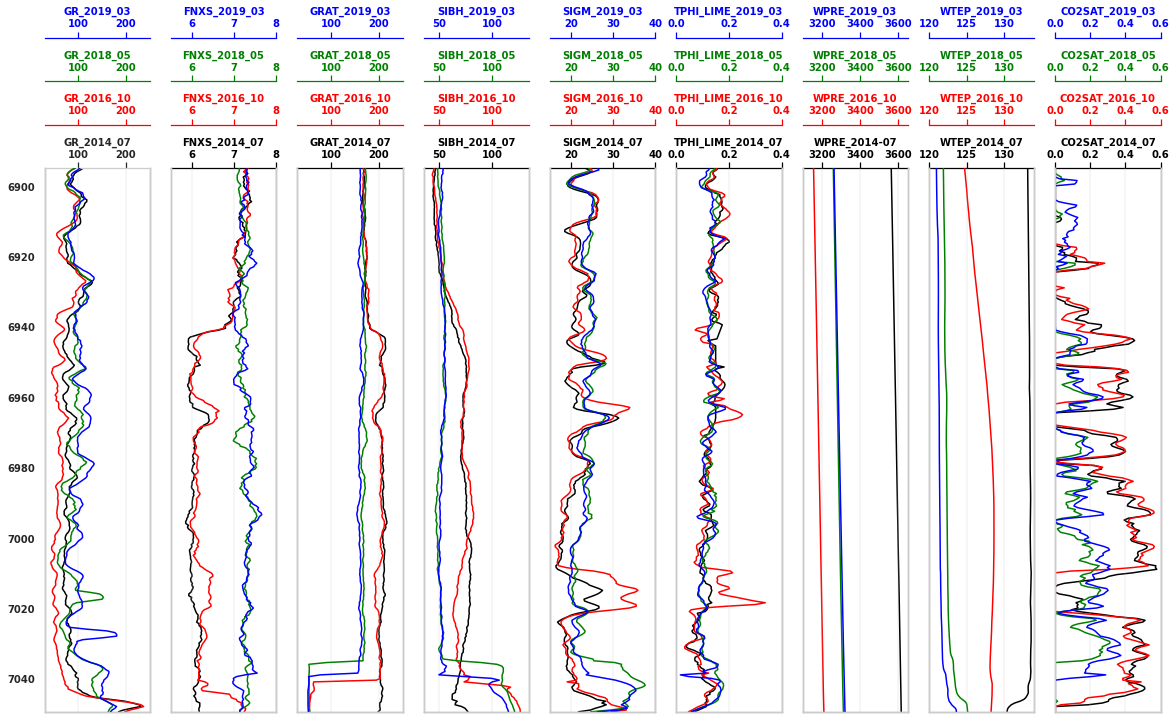

In [25]:
fig, axes = plt.subplots(figsize=(20,10))
lw_value = 1.5

curve_names = ['GR_2014_07','FNXS_2014_07','GRAT_2014_07','SIBH_2014_07','SIGM_2014_07','TPHI_LIME_2014_07','WPRE_2014-07','WTEP_2014_07','CO2SAT_2014_07',
         'GR_2016_10','FNXS_2016_10','GRAT_2016_10','SIBH_2016_10','SIGM_2016_10','TPHI_LIME_2016_10','WPRE_2016_10','WTEP_2016_10','CO2SAT_2016_10',
         'GR_2018_05','FNXS_2018_05','GRAT_2018_05','SIBH_2018_05','SIGM_2018_05','TPHI_LIME_2018_05','WPRE_2018_05','WTEP_2018_05','CO2SAT_2018_05',
         'GR_2019_03','FNXS_2019_03','GRAT_2019_03','SIBH_2019_03','SIGM_2019_03','TPHI_LIME_2019_03','WPRE_2019_03','WTEP_2019_03','CO2SAT_2019_03']
rc('font', weight='bold')


#Set up the plot axes
ax1 = plt.subplot2grid((1,9), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,9), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,9), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,9), (0,3), rowspan=1, colspan = 1) 
ax5 = plt.subplot2grid((1,9), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,9), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,9), (0,6), rowspan=1, colspan = 1) 
ax8 = plt.subplot2grid((1,9), (0,7), rowspan=1, colspan = 1) 
ax9 = plt.subplot2grid((1,9), (0,8), rowspan=1, colspan = 1) 

ax10 = ax1.twiny()
ax11 = ax2.twiny()
ax12 = ax3.twiny()
ax13 = ax4.twiny()
ax14 = ax5.twiny()
ax15 = ax6.twiny()
ax16 = ax7.twiny()
ax17 = ax8.twiny()
ax18 = ax9.twiny()

ax19 = ax1.twiny()
ax20 = ax2.twiny()
ax21 = ax3.twiny()
ax22 = ax4.twiny()
ax23 = ax5.twiny()
ax24 = ax6.twiny()
ax25 = ax7.twiny()
ax26 = ax8.twiny()
ax27 = ax9.twiny()

ax28 = ax1.twiny()
ax29 = ax2.twiny()
ax30 = ax3.twiny()
ax31 = ax4.twiny()
ax32 = ax5.twiny()
ax33 = ax6.twiny()
ax34 = ax7.twiny()
ax35 = ax8.twiny()
ax36 = ax9.twiny()

#Set up the individual log tracks / subplots
ax1.plot('GR_2014-07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax1.set_xlim(30, 250)

ax10.plot('GR_2016-10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax10.xaxis.label.set_color("red")
ax10.tick_params(axis='x', colors="red")
ax10.spines["top"].set_edgecolor("red")
ax10.set_xlim(30, 250)

ax19.plot('GR_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax19.xaxis.label.set_color("green")
ax19.tick_params(axis='x', colors="green")
ax19.spines["top"].set_edgecolor("green")
ax19.set_xlim(30, 250)

ax28.plot('GR_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax28.xaxis.label.set_color("blue")
ax28.tick_params(axis='x', colors="blue")
ax28.spines["top"].set_edgecolor("blue")
ax28.set_xlim(30, 250)

# Plot2
ax2.plot('FNXS_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax2.xaxis.label.set_color("black")
ax2.tick_params(axis='x', colors="black")
ax2.spines["top"].set_edgecolor("black")
ax2.set_xlim(5.5, 8.0)

ax11.plot('FNXS_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax11.xaxis.label.set_color("red")
ax11.tick_params(axis='x', colors="red")
ax11.spines["top"].set_edgecolor("red")
ax11.set_xlim(5.5, 8.0)

ax20.plot('FNXS_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax20.xaxis.label.set_color("green")
ax20.tick_params(axis='x', colors="green")
ax20.spines["top"].set_edgecolor("green")
ax20.set_xlim(5.5, 8.0)

ax29.plot('FNXS_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax29.xaxis.label.set_color("blue")
ax29.tick_params(axis='x', colors="blue")
ax29.spines["top"].set_edgecolor("blue")
ax29.set_xlim(5.5, 8.0)

# Plot3
ax3.plot('GRAT_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax3.xaxis.label.set_color("black")
ax3.tick_params(axis='x', colors="black")
ax3.spines["top"].set_edgecolor("black")
ax3.set_xlim(30, 250)

ax12.plot('GRAT_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax12.xaxis.label.set_color("red")
ax12.tick_params(axis='x', colors="red")
ax12.spines["top"].set_edgecolor("red")
ax12.set_xlim(30, 250)

ax21.plot('GRAT_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax21.xaxis.label.set_color("green")
ax21.tick_params(axis='x', colors="green")
ax21.spines["top"].set_edgecolor("green")
ax21.set_xlim(30, 250)

ax30.plot('GRAT_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax30.xaxis.label.set_color("blue")
ax30.tick_params(axis='x', colors="blue")
ax30.spines["top"].set_edgecolor("blue")
ax30.set_xlim(30, 250)

# Plot4
ax4.plot('SIBH_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax4.xaxis.label.set_color("black")
ax4.tick_params(axis='x', colors="black")
ax4.spines["top"].set_edgecolor("black")
ax4.set_xlim(35, 135)

ax13.plot('SIBH_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax13.xaxis.label.set_color("red")
ax13.tick_params(axis='x', colors="red")
ax13.spines["top"].set_edgecolor("red")
ax13.set_xlim(35, 135)

ax22.plot('SIBH_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax22.xaxis.label.set_color("green")
ax22.tick_params(axis='x', colors="green")
ax22.spines["top"].set_edgecolor("green")
ax22.set_xlim(35, 135)

ax31.plot('SIBH_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax31.xaxis.label.set_color("blue")
ax31.tick_params(axis='x', colors="blue")
ax31.spines["top"].set_edgecolor("blue")
ax31.set_xlim(35, 135)

# Plot5
ax5.plot('SIGM_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax5.xaxis.label.set_color("black")
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_edgecolor("black")
ax5.set_xlim(15, 40)

ax14.plot('SIGM_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax14.xaxis.label.set_color("red")
ax14.tick_params(axis='x', colors="red")
ax14.spines["top"].set_edgecolor("red")
ax14.set_xlim(15, 40)

ax23.plot('SIGM_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax23.xaxis.label.set_color("green")
ax23.tick_params(axis='x', colors="green")
ax23.spines["top"].set_edgecolor("green")
ax23.set_xlim(15, 40)

ax32.plot('SIGM_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax32.xaxis.label.set_color("blue")
ax32.tick_params(axis='x', colors="blue")
ax32.spines["top"].set_edgecolor("blue")
ax32.set_xlim(15, 40)

# Plot6
ax6.plot('TPHI_LIME_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.set_xlim(0, 0.4)

ax15.plot('TPHI_LIME_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax15.xaxis.label.set_color("red")
ax15.tick_params(axis='x', colors="red")
ax15.spines["top"].set_edgecolor("red")
ax15.set_xlim(0, 0.4)

ax24.plot('TPHI_LIME_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax24.xaxis.label.set_color("green")
ax24.tick_params(axis='x', colors="green")
ax24.spines["top"].set_edgecolor("green")
ax24.set_xlim(0, 0.4)

ax33.plot('TPHI_LIME_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax33.xaxis.label.set_color("blue")
ax33.tick_params(axis='x', colors="blue")
ax33.spines["top"].set_edgecolor("blue")
ax33.set_xlim(0, 0.4)

# Plot7
ax7.plot('WPRE_2014-07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax7.xaxis.label.set_color("black")
ax7.tick_params(axis='x', colors="black")
ax7.spines["top"].set_edgecolor("black")
ax7.set_xlim(3100, 3650)

ax16.plot('WPRE_2016-10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax16.xaxis.label.set_color("red")
ax16.tick_params(axis='x', colors="red")
ax16.spines["top"].set_edgecolor("red")
ax16.set_xlim(3100, 3650)

ax25.plot('WPRE_2018-05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax25.xaxis.label.set_color("green")
ax25.tick_params(axis='x', colors="green")
ax25.spines["top"].set_edgecolor("green")
ax25.set_xlim(3100, 3650)

ax34.plot('WPRE_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax34.xaxis.label.set_color("blue")
ax34.tick_params(axis='x', colors="blue")
ax34.spines["top"].set_edgecolor("blue")
ax34.set_xlim(3100, 3650)

# Plot8
ax8.plot('WTEP_2014-07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax8.xaxis.label.set_color("black")
ax8.tick_params(axis='x', colors="black")
ax8.spines["top"].set_edgecolor("black")
ax8.set_xlim(120, 134)

ax17.plot('WTEP_2016-10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax17.xaxis.label.set_color("red")
ax17.tick_params(axis='x', colors="red")
ax17.spines["top"].set_edgecolor("red")
ax17.set_xlim(120, 134)

ax26.plot('WTEP_2018-05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax26.xaxis.label.set_color("green")
ax26.tick_params(axis='x', colors="green")
ax26.spines["top"].set_edgecolor("green")
ax26.set_xlim(120, 134)

ax35.plot('WTEP_2019-03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax35.xaxis.label.set_color("blue")
ax35.tick_params(axis='x', colors="blue")
ax35.spines["top"].set_edgecolor("blue")
ax35.set_xlim(120, 134)

# Plot9
ax9.plot('CO2SAT_2014_07', 'Z_MD', data = ccs1_pnx_data_value_2014_07_ROI, color = "black", lw = lw_value)
ax9.xaxis.label.set_color("black")
ax9.tick_params(axis='x', colors="black")
ax9.spines["top"].set_edgecolor("black")
ax9.set_xlim(0, 0.6)

ax18.plot('CO2SAT_2016_10', 'Z_MD', data = ccs1_pnx_data_value_2016_10_ROI, color = "red", lw = lw_value)
ax18.xaxis.label.set_color("red")
ax18.tick_params(axis='x', colors="red")
ax18.spines["top"].set_edgecolor("red")
ax18.set_xlim(0, 0.6)

ax27.plot('CO2SAT_2018_05', 'Z_MD', data = ccs1_pnx_data_value_2018_05_ROI, color = "green", lw = lw_value)
ax27.xaxis.label.set_color("green")
ax27.tick_params(axis='x', colors="green")
ax27.spines["top"].set_edgecolor("green")
ax27.set_xlim(0, 0.6)

ax36.plot('CO2SAT_2019_03', 'Z_MD', data = ccs1_pnx_data_value_2019_03_ROI, color = "blue", lw = lw_value)
ax36.xaxis.label.set_color("blue")
ax36.tick_params(axis='x', colors="blue")
ax36.spines["top"].set_edgecolor("blue")
ax36.set_xlim(0, 0.6)

for i, ax in enumerate(fig.axes):
  ax.set_ylim(7049.5, 6895) # Set the depth range
    
  ax.tick_params(labelsize=10)
  ax.xaxis.set_ticks_position("top")
  ax.xaxis.set_label_position("top")
  ax.set_xlabel(curve_names[i],fontweight="bold",size=10)

  if i in [9,10,11,12,13,14,15,16,17]:
    ax.spines["top"].set_position(("axes", 1.08))
  else:
    ax.grid()

  if i in [18,19,20,21,22,23,24,25,26]:
    ax.spines["top"].set_position(("axes", 1.16))
  else:
    ax.grid()

  if i in [27,28,29,30,31,32,33,34,35]:
    ax.spines["top"].set_position(("axes", 1.24))
  else:
    ax.grid()

for ax in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,ax24,ax25,ax26,ax27,ax28,ax29,ax30,ax31,ax32,ax33,ax34,ax35]:
  plt.setp(ax.get_yticklabels(), visible = False)

fig.subplots_adjust(wspace = 0.20)
#fig.savefig(sys_path+'Figures/PNX_log_raw.png',dpi=300, bbox_inches='tight')

In [ ]:
ccs1_pnx_data_value_2014_07_ROI

# Part 1: Conventional well-logging data and minerals



In [ ]:
all_data = all_train_data.append(all_test_data)

In [ ]:
Raw_Group_conv = ['HTNP','PEFZ','RHOZ','RLA2','RLA3','RLA4','RLA5','GAMMA','DTCO','DTSM','Z_MD']
Label_Group_conv = ['CALCITE','CHLORITE','DOLOMITE','HEMATITE','ILLITE','K-FELDSPAR','KAOLINITE','N-FELDSPAR','PYRITE','QUARTZ','SIDERITE','PHIT']

feature_vectors = all_data[Raw_Group_conv]
X_scaler = preprocessing.StandardScaler().fit(feature_vectors)
X_data_conv = X_scaler.transform(feature_vectors)

Y_data_quartz = all_data['QUARTZ']
Y_data_feldspar = all_data['K-FELDSPAR']+all_data['N-FELDSPAR']
Y_data_dolomite = all_data['DOLOMITE']
Y_data_calcite = all_data['CALCITE']
Y_data_clay = all_data['KAOLINITE']+all_data['ILLITE']+all_data['CHLORITE']
Y_data_others = all_data['SIDERITE']+all_data['PYRITE']+all_data['HEMATITE']
Y_data_porosity = all_data['PHIT']

In [ ]:
Y_data_porosity.mean()

0.12068474411463664

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data_conv, Y_data_porosity, test_size=0.2, random_state=42)
print('Train shape: Feature')
print(X_train.shape)
print('Train shape: Label')
print(Y_train.shape)

print('Test shape: Feature')
print(X_test.shape)
print('Test shape: Label')
print(Y_test.shape)

Train shape: Feature
(9379, 11)
Train shape: Label
(9379,)
Test shape: Feature
(2345, 11)
Test shape: Label
(2345,)


a. Support vector regression

In [ ]:
Y_train_data = Y_train
Y_test_data = Y_test
parameters = {'C':[0.5, 1.0, 2.0, 5.0, 10],'gamma': [1e-1, 1],'epsilon':[0.003, 0.005, 0.007, 0.1]}
#parameters = {'kernel': ('linear','rbf','poly'), 'C':[0.5, 1.0, 2.0, 5.0, 10],'gamma': [1e-1],'epsilon':[0.01, 0.03, 0.05]}
#parameters = {'kernel': ('linear','rbf','poly'), 'C':[2],'gamma': [1e-1],'epsilon':[0.03]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)

In [ ]:
clf.fit(X_train,Y_train_data)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5, 1.0, 2.0, 5.0, 10],
                         'epsilon': [0.003, 0.005, 0.007, 0.1],
                         'gamma': [0.1, 1]})

In [ ]:
clf.best_params_

{'C': 1.0, 'epsilon': 0.003, 'gamma': 0.1}

In [ ]:
best_C = clf.best_params_['C']
best_epsilon = clf.best_params_['epsilon']
best_gamma = clf.best_params_['gamma']
best_kernel = 'rbf'

svr_best = SVR(kernel=best_kernel, C=best_C, gamma=best_gamma, epsilon=best_epsilon)

# #############################################################################
# Look at the results

svr_best.fit(X_train,Y_train_data)
label_predicted = svr_best.predict(X_test)
label_predicted[label_predicted < 0] = 0

mse = mean_squared_error(label_predicted, Y_test_data)
print('MSE')
print(mse)

r2_metrics = r2_score(label_predicted, Y_test_data)
print('R2 score')
print(r2_metrics)

MSE
7.384403113782994e-05
R2 score
0.9750683241613429


0.0
0.10130915521581302


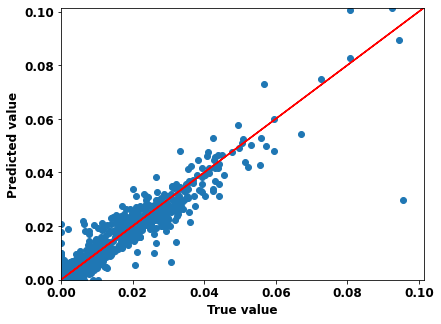

In [ ]:
fig = plt.figure(figsize=(6.5,5))

lower_B = np.min([Y_test_data.min(),label_predicted.min()])
higher_B = np.max([Y_test_data.max(),label_predicted.max()])
print(lower_B)
print(higher_B)

plt.scatter(Y_test_data,label_predicted)
plt.xlim(lower_B, higher_B)
plt.ylim(lower_B, higher_B)
#plt.plot(Y_test_data,Y_test_data,'red')
plt.plot(label_predicted,label_predicted,'red')
plt.xlabel('True value', fontweight='bold', fontsize=12)
plt.ylabel('Predicted value', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)

fig.savefig(sys_path+'Figures/Minerals_SVR/OTHERS_svr',dpi=300, bbox_inches='tight')

b. Deep Neural Network

Multi-output model

In [ ]:
Y_data_conv = np.concatenate((Y_data_quartz.values.reshape(-1,1), Y_data_feldspar.values.reshape(-1,1), Y_data_dolomite.values.reshape(-1,1),
                Y_data_calcite.values.reshape(-1,1), Y_data_clay.values.reshape(-1,1), Y_data_others.values.reshape(-1,1),
                Y_data_porosity.values.reshape(-1,1)), axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data_conv, Y_data_conv, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(9379, 11)

In [ ]:
X_test.shape

(2345, 11)

In [ ]:
def get_model(n_inputs, n_outputs):
  model = keras.Sequential()
  model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  #model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  #model.add(Dense(n_outputs, activation='softmax'))
  model.add(Dense(n_outputs))
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

In [ ]:
n_inputs, n_outputs = X_train.shape[1],Y_train.shape[1]
model_multiO = get_model(n_inputs,n_outputs)
opt = keras.optimizers.Adam(learning_rate=0.00025)
model_multiO.compile(loss='mean_squared_error', optimizer=opt)
history = model_multiO.fit(X_train, Y_train,  validation_split=0.2, epochs=200, batch_size=1)

In [ ]:
model_multiO = tf.keras.models.load_model(sys_path+'Figures/Minerals_ANN/Mineral_KNN_0704.h5')

In [ ]:
#model.save(sys_path+'Figures/Minerals_ANN/Mineral_KNN_0704.h5')

In [ ]:
Y_hat_M = model_multiO.predict(X_test)
Y_hat_M[Y_hat_M < 0] = 0

0.0
0.9363847970962524
RMSE
0.03505678738645175
R2
0.956596874946925


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

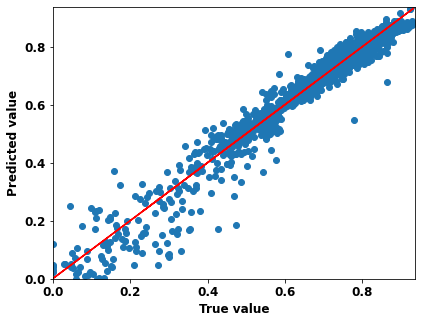

In [ ]:
item_pred = 0

fig = plt.figure(figsize=(6.5,5))

plt.scatter(Y_test[:,item_pred],Y_hat_M[:,item_pred])
#plt.plot(Y_hat[:,item_pred],Y_hat[:,item_pred],'red')
plt.plot(Y_test[:,item_pred],Y_test[:,item_pred],'red')

lower_B = np.min([Y_test[:,item_pred].min(),Y_hat_M[:,item_pred].min()])
higher_B = np.max([Y_test[:,item_pred].max(),Y_hat_M[:,item_pred].max()])
print(lower_B)
print(higher_B)

plt.xlabel('True value')
plt.ylabel('Predicted value')
mse = mean_squared_error(Y_test[:,item_pred], Y_hat_M[:,item_pred])
print('RMSE')
print(np.sqrt(mse))
r2_metrics = r2_score(Y_test[:,item_pred], Y_hat_M[:,item_pred])
print('R2')
print(r2_metrics)

plt.xlim(lower_B, higher_B)
plt.ylim(lower_B, higher_B)

plt.xlabel('True value', fontweight='bold', fontsize=12)
plt.ylabel('Predicted value', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#fig.savefig(sys_path+'Figures/Minerals_ANN/POROSITY_ann',dpi=300, bbox_inches='tight')

In [ ]:
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = sys_path+'Figures/Minerals_ANN/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [ ]:
#
# summarize history for loss

fig = plt.figure(figsize=(6.5,5))

plt.plot(history.history['loss'], linewidth=1.5)
plt.plot(history.history['val_loss'], linewidth=1.5)

plt.ylabel('Loss value', fontweight='bold', fontsize=12)
plt.xlabel('Epoch', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

legend_properties = {'weight':'bold'}
                          
plt.legend(['Training', 'Testing'], loc='upper right', prop=legend_properties, frameon=False)
#fig.savefig(sys_path+'Figures/Minerals_ANN/LOSS_CURVE_ann',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
history_dict = json.load(open(sys_path+'Figures/Minerals_ANN/history.json' , 'r'))

In [ ]:
fig = plt.figure(figsize=(6.5,5))

X = list(range(150))
Loss_train = []
Loss_test = []

for i in range(150):
  index_str = str(i)
  Loss_train.append(history_dict['loss'][index_str])
  Loss_test.append(history_dict['val_loss'][index_str])

plt.plot(X,Loss_train,linewidth=1.5)
plt.plot(X,Loss_test,linewidth=1.5)

plt.ylabel('Loss value', fontweight='bold', fontsize=12)
plt.xlabel('Epoch', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

legend_properties = {'weight':'bold'}
                          
plt.legend(['Training', 'Testing'], loc='upper right', prop=legend_properties, frameon=False)
fig.savefig(sys_path+'Figures/Minerals_ANN/LOSS_CURVE_ann',dpi=300, bbox_inches='tight')
plt.show()

# **Part 2: PNX well-logging and fluid saturation**

In [ ]:
# Combine all data
PNX_all_data = np.concatenate((ccs1_pnx_data_value_2014_07_ROI.values,ccs1_pnx_data_value_2016_10_ROI.values,ccs1_pnx_data_value_2018_05_ROI.values,ccs1_pnx_data_value_2019_03_ROI.values,
                vw1_pnx_data_value_2015_11_ROI.values,vw1_pnx_data_value_2017_09_ROI.values,vw1_pnx_data_value_2018_05_ROI.values,vw1_pnx_data_value_2019_03_ROI.values),axis=0)

In [ ]:
PNX_all_data.shape

(1661, 13)

In [ ]:
# Select interested input and output
PNX_all_df = pd.DataFrame(PNX_all_data[:,0:11], columns = ['GR','FNXS','GRAT','SIBH','SIGM','TPHI','WPRE','WTEP','Z_MD','CO2','CO2SAT'])
#PNX_all_df = pd.DataFrame(PNX_all_data[:,0:9], columns = ['GR','FNXS','GRAT','SIBH','SIGM','TPHI','WPRE','WTEP','CO2SAT'])

In [ ]:
# Correlation matrix
f = plt.figure(figsize=(19, 15))
corr = PNX_all_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,GR,FNXS,GRAT,SIBH,SIGM,TPHI,WPRE,WTEP,CO2SAT
GR,1.00,0.23,0.08,-0.21,0.26,0.23,0.30,-0.03,0.16
FNXS,0.23,1.00,-0.31,0.15,0.05,0.45,-0.06,-0.40,-0.08
GRAT,0.08,-0.31,1.00,-0.71,-0.47,0.39,0.64,0.61,0.10
SIBH,-0.21,0.15,-0.71,1.00,0.26,-0.16,-0.36,-0.11,0.16
SIGM,0.26,0.05,-0.47,0.26,1.00,0.06,-0.26,-0.33,-0.22
TPHI,0.23,0.45,0.39,-0.16,0.06,1.00,0.50,0.28,-0.14
WPRE,0.30,-0.06,0.64,-0.36,-0.26,0.50,1.00,0.72,0.10
WTEP,-0.03,-0.40,0.61,-0.11,-0.33,0.28,0.72,1.00,0.17
CO2SAT,0.16,-0.08,0.10,0.16,-0.22,-0.14,0.10,0.17,1.00


<Figure size 1368x1080 with 0 Axes>

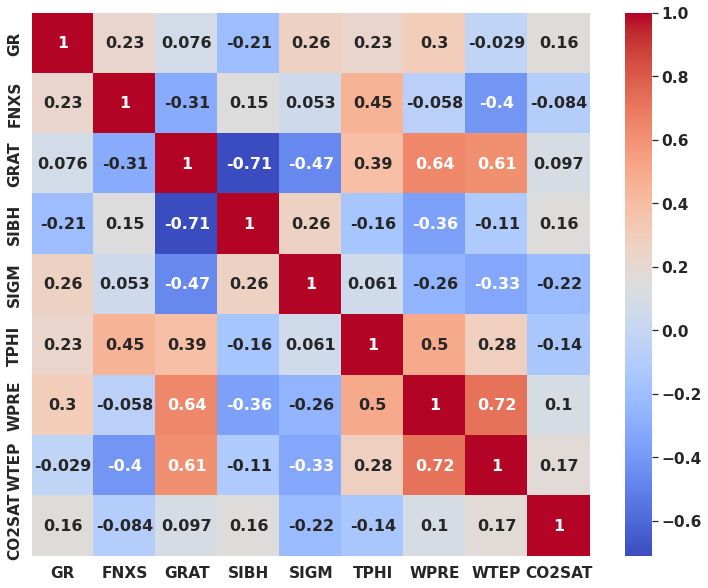

In [ ]:
from sklearn.utils.extmath import weighted_mode
plt.figure(figsize=(12.5, 10))
sns.set(font_scale=1.4)
rc('font', weight='bold')
s = sns.heatmap(corr, cmap="coolwarm",annot=True,annot_kws={"size": 16,"weight": "bold"},)

fig = s.get_figure()
fig.savefig(sys_path+'Figures/CO2SAT/FEATURE_CORR',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Data for ML and DL

Raw_Group_conv = ['GR','FNXS','GRAT','SIBH','SIGM','TPHI','WPRE','WTEP']
#Raw_Group_conv = ['GR']
Label_Group_conv = ['CO2','CO2SAT']

feature_vectors = PNX_all_df[Raw_Group_conv]
X_scaler = preprocessing.StandardScaler().fit(feature_vectors)
X_data_conv = X_scaler.transform(feature_vectors)


#Y_data_co2 = PNX_all_df['CO2']
Y_data_co2sat = PNX_all_df['CO2SAT']

In [ ]:
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X_data_conv, Y_data_co2sat, test_size=0.2, random_state=42)
print('Train shape: Feature')
print(X_train.shape)
print('Train shape: Label')
print(Y_train.shape)

print('Test shape: Feature')
print(X_test.shape)
print('Test shape: Label')
print(Y_test.shape)

Train shape: Feature
(1328, 8)
Train shape: Label
(1328,)
Test shape: Feature
(333, 8)
Test shape: Label
(333,)


SVR

In [ ]:
Y_train_data = Y_train
Y_test_data = Y_test
parameters = {'C':[0.5, 1.0, 2.0, 5.0, 10],'gamma': [1e-1, 1],'epsilon':[0.001, 0.003, 0.005, 0.007, 0.01]}
#parameters = {'kernel': ('linear','rbf','poly'), 'C':[0.1, 0.5, 1.0, 5.0],'gamma': [0.1, 1.0],'epsilon':[0.005, 0.01]}
#parameters = {'kernel': ('linear','rbf','poly'), 'C':[2],'gamma': [1e-1],'epsilon':[0.03]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)

In [ ]:
clf.fit(X_train,Y_train_data)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.5, 1.0, 2.0, 5.0, 10],
                         'epsilon': [0.001, 0.003, 0.005, 0.007, 0.01],
                         'gamma': [0.1, 1]})

In [ ]:
clf.best_params_

{'C': 2.0, 'epsilon': 0.007, 'gamma': 1}

In [ ]:
best_C = clf.best_params_['C']
best_epsilon = clf.best_params_['epsilon']
best_gamma = clf.best_params_['gamma']
best_kernel = 'rbf'

#best_C = 2
#best_epsilon = 0.005
#best_gamma = 1
#best_kernel = 'rbf'

svr_best = SVR(kernel=best_kernel, C=best_C, gamma=best_gamma, epsilon=best_epsilon)

# #############################################################################
# Look at the results

svr_best.fit(X_train,Y_train_data)
label_predicted = svr_best.predict(X_test)
label_predicted[label_predicted < 0] = 0

mse = mean_squared_error(label_predicted, Y_test_data)
print('MSE')
print(mse)

print('RMSE')
print(np.sqrt(mse))

r2_metrics = r2_score(label_predicted, Y_test_data)
print('R2 score')
print(r2_metrics)

MSE
0.001985878881221698
RMSE
0.04456320097593639
R2 score
0.9215721134121393


0.0
0.5731


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

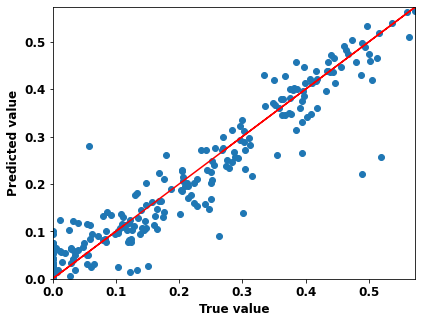

In [ ]:
fig = plt.figure(figsize=(6.5,5))

lower_B = np.min([Y_test_data.min(),label_predicted.min()])
higher_B = np.max([Y_test_data.max(),label_predicted.max()])
print(lower_B)
print(higher_B)

plt.scatter(Y_test_data,label_predicted)
plt.xlim(lower_B, higher_B)
plt.ylim(lower_B, higher_B)
plt.plot(Y_test_data,Y_test_data,'red')
plt.xlabel('True value', fontweight='bold', fontsize=12)
plt.ylabel('Predicted value', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#fig.savefig(sys_path+'Figures/CO2SAT/CO2SAT_SVR.png',dpi=300, bbox_inches='tight')

In [ ]:
def f_importances(coef, names):
  imp = coef
  imp,names = zip(*sorted(zip(imp,names)))
  plt.barh(range(len(names)), imp, align='center')
  plt.yticks(range(len(names)), names)
  plt.show()

In [ ]:
perm_importance = permutation_importance(svr_best, X_test,Y_test_data, n_repeats=30, scoring = 'neg_mean_squared_error')

feature_names = Raw_Group_conv
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()

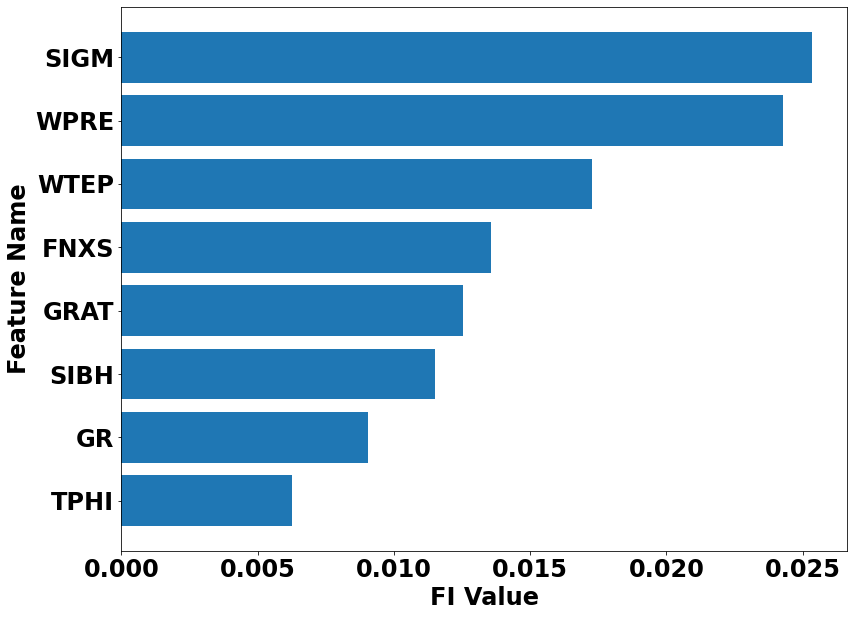

In [ ]:
fig = plt.figure(figsize=(13,10))

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')

plt.xlabel('FI Value', fontweight='bold', fontsize=24)
plt.ylabel('Feature Name', fontweight='bold', fontsize=24)

fig.savefig(sys_path+'Figures/CO2SAT/ImportanceRank.png',dpi=300, bbox_inches='tight')

In [ ]:
def get_model(n_inputs, n_outputs):
  model = keras.Sequential()
  model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  #model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(150, kernel_initializer='he_uniform', activation='relu'))
  #model.add(Dense(n_outputs, activation='softmax'))
  model.add(Dense(n_outputs))
  model.compile(loss='mean_squared_error', optimizer='adam')

  return model

In [ ]:
n_inputs, n_outputs = X_train.shape[1],1
model = get_model(n_inputs,n_outputs)
opt = keras.optimizers.Adam(learning_rate=0.00025)
model.compile(loss='mean_squared_error', optimizer=opt)
history = model.fit(X_train, Y_train,  validation_split=0.2, epochs=200, batch_size=1)

Epoch 1/200
1062/1062 [==============================] - 4s 2ms/step - loss: 0.0735 - val_loss: 0.0348
Epoch 2/200
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0344 - val_loss: 0.1197
Epoch 3/200
1062/1062 [==============================] - 5s 5ms/step - loss: 0.0411 - val_loss: 0.1137
Epoch 4/200
1062/1062 [==============================] - 5s 5ms/step - loss: 0.0363 - val_loss: 0.1035
Epoch 5/200
1062/1062 [==============================] - 4s 4ms/step - loss: 0.0358 - val_loss: 0.0305
Epoch 6/200
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0276 - val_loss: 0.0147
Epoch 7/200
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0213 - val_loss: 0.0185
Epoch 8/200
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0272 - val_loss: 0.0119
Epoch 9/200
1062/1062 [==============================] - 3s 3ms/step - loss: 0.0181 - val_loss: 0.0136
Epoch 10/200
1062/1062 [==============================] - 3s 2ms/step - l

In [ ]:
perm_importance = permutation_importance(model, X_test,Y_test_data, n_repeats=30,scoring='neg_mean_squared_error')

feature_names = Raw_Group_conv
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()

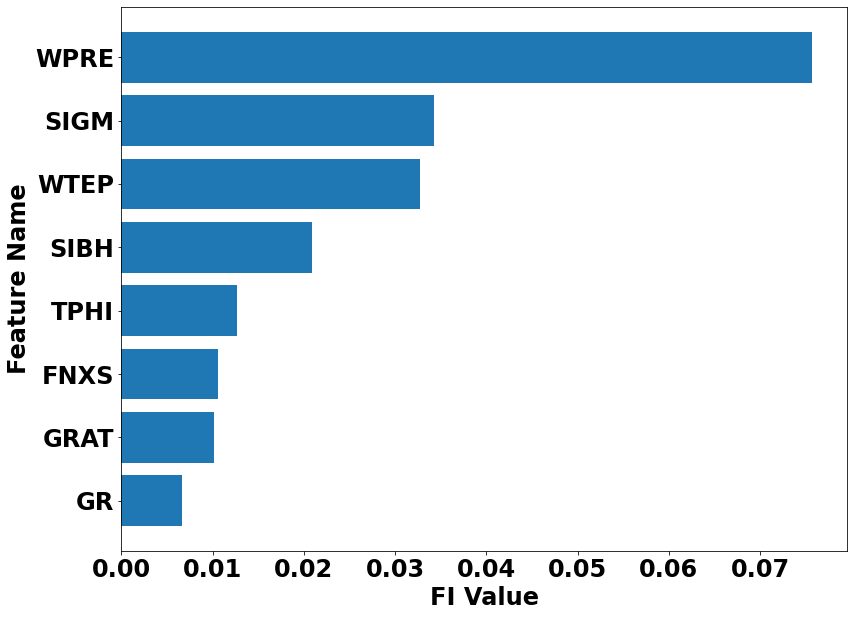

In [ ]:
fig = plt.figure(figsize=(13,10))

plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

plt.xticks(fontsize=24, fontweight='bold')
plt.yticks(fontsize=24, fontweight='bold')

plt.xlabel('FI Value', fontweight='bold', fontsize=24)
plt.ylabel('Feature Name', fontweight='bold', fontsize=24)

fig.savefig(sys_path+'Figures/CO2SAT/ImportanceRank_ann.png',dpi=300, bbox_inches='tight')

In [ ]:
Y_hat = model.predict(X_test)
Y_hat[Y_hat < 0] = 0

print(Y_test.shape)
print(Y_hat.shape)

(333,)
(333, 1)


0.0
0.5731
RMSE
0.05095995298449386
R2
0.9080762528232563


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

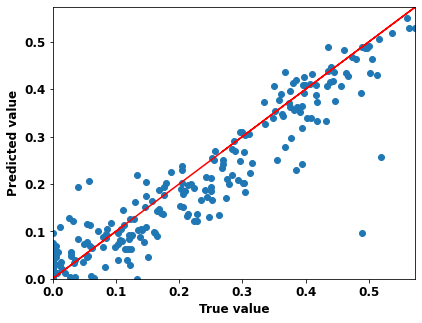

In [ ]:
fig = plt.figure(figsize=(6.5,5))

plt.scatter(Y_test,Y_hat)
#plt.plot(Y_hat[:,item_pred],Y_hat[:,item_pred],'red')
plt.plot(Y_test,Y_test,'red')

lower_B = np.min([Y_test.min(),Y_hat.min()])
higher_B = np.max([Y_test.max(),Y_hat.max()])
print(lower_B)
print(higher_B)

plt.xlabel('True value')
plt.ylabel('Predicted value')
mse = mean_squared_error(Y_test, Y_hat)
print('RMSE')
print(np.sqrt(mse))
r2_metrics = r2_score(Y_test, Y_hat)
print('R2')
print(r2_metrics)

plt.xlim(lower_B, higher_B)
plt.ylim(lower_B, higher_B)

plt.xlabel('True value', fontweight='bold', fontsize=12)
plt.ylabel('Predicted value', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

#fig.savefig(sys_path+'Figures/CO2SAT/CO2SAR_ann',dpi=300, bbox_inches='tight')

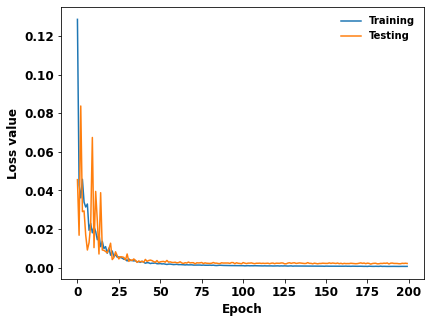

In [ ]:
# summarize history for loss

fig = plt.figure(figsize=(6.5,5))

plt.plot(history.history['loss'], linewidth=1.5)
plt.plot(history.history['val_loss'], linewidth=1.5)
plt.ylabel('Loss value', fontweight='bold', fontsize=12)
plt.xlabel('Epoch', fontweight='bold', fontsize=12)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

legend_properties = {'weight':'bold'}
                          
plt.legend(['Training', 'Testing'], loc='upper right', prop=legend_properties, frameon=False)
#fig.savefig(sys_path+'Figures/CO2SAT/LOSS_CURVE_ann',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = sys_path+'Figures/CO2SAT/history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)